In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
dali_folder = "/content/drive/My Drive/Capstone_LyricsGen/GPT-3 Baseline/DALI"

In [9]:
! pip install DALI

  Using cached dali-1.0.9.tar.gz (73 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [10]:
import DALI as dali_code
import json
dali_data_path = 'D:\我\Desktop\Capstone\DALI'
dali_data = dali_code.get_the_DALI_dataset(dali_data_path, skip=[], keep=[])

ModuleNotFoundError: ignored

In [ ]:
dali_info = dali_code.get_info(dali_data_path + '\info\DALI_DATA_INFO.gz')
print(dali_info[0])
print(len(dali_info))

['DALI_ID' 'NAME' 'YOUTUBE' 'WORKING']
5359


In [ ]:
# path_save = 'D:\我\Desktop\Capstone\DALI_json'
# for i in dali_info[1:]:
#     name  = i[0]
#     print(name)
#     entry = dali_data[name]
#     # export
#     entry.write_json(path_save, name)


## Baseline Data Extraction
Vertical

In [ ]:
import math

def freq_to_note(frequency):
    # Define a list of note names
    note_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

    # Calculate the MIDI note number
    midi_note = 12 * (math.log2(frequency / 440.0)) + 69

    # Calculate the octave and note index
    octave = int(midi_note) // 12 - 1
    note_index = int(midi_note) % 12

    # Get the note name from the list and append the octave
    note_name = note_names[note_index]
    full_note_name = f"{note_name}{octave}"

    return full_note_name

# Example usage
frequency = 440  # Replace with your frequency value in Hertz
note_name = freq_to_note(frequency)
print(note_name)  # Output: "A4"


A4


In [ ]:
dali_data['520f583def024997adcab0567fb25a5d'].horizontal2vertical()

In [ ]:
clean_data = {}
pitch_contour = []
text_contour = []
dur = 0
count = 0
for i in dali_info[1:200]:
    index = i[0]
    clean_data[index] = []
    entry = dali_data[index]
    entry.horizontal2vertical()
    try:
        my_annot = entry.annotations['annot']['hierarchical']
        for para in my_annot:
            my_paragraph = para['text']
            tmp1 = []
            for line in my_paragraph:
                my_line = line['text']
                try:
                    notes_in_line, _ = dali_code.unroll(my_line, depth=1, output=[])
                    tmp2 = []
                    for n in notes_in_line:
                        duration = round(n['time'][1] - n['time'][0],3)
                        pitch_contour.append(n['freq'][0])
                        text_contour.append(n['text'])
                        # pitch = freq_to_note(n['freq'][0])

                        text = n['text']
                        tmp2.append({'duration':duration, 'pitch':pitch, 'text': text})
                        # Average Duration = 0.33148764312964024
                        dur += duration
                        count += 1
                    tmp1.append(tmp2)
                except:
                    continue
            clean_data[index].append(tmp1)
    except:
        print('skip')
        continue
    break

Annot are already in a horizontal format


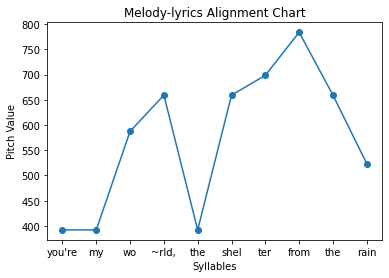

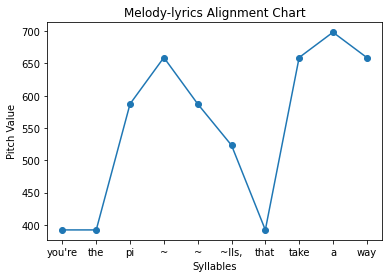

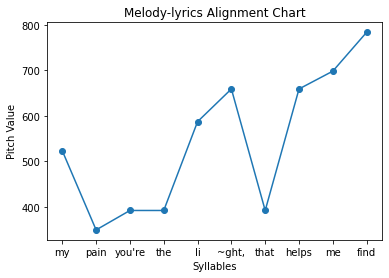

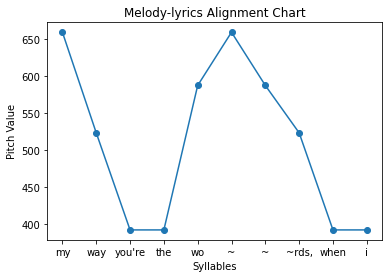

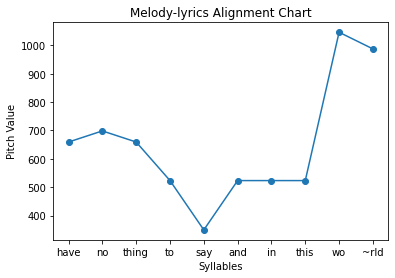

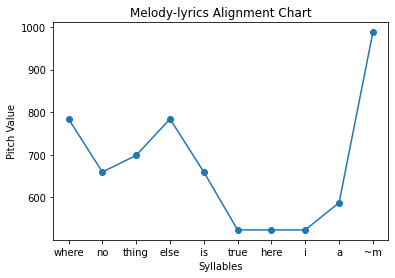

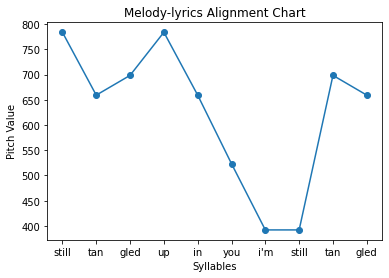

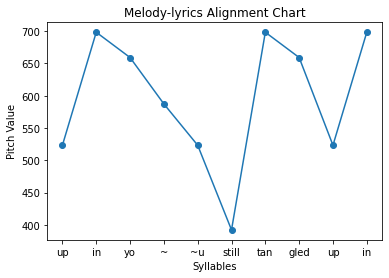

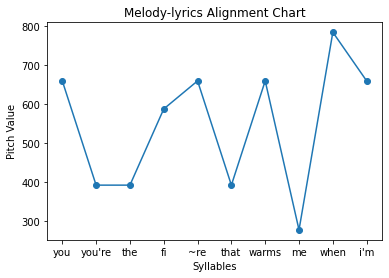

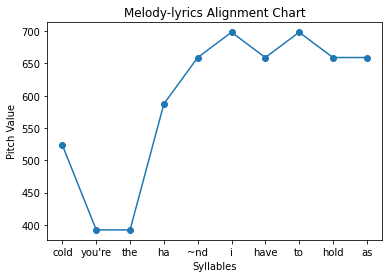

In [ ]:
import matplotlib.pyplot as plt
def ML_chart(start, end):
    data = pitch_contour[start:end]
    labels = text_contour[start:end]

    # Create x-values (assuming an increment of 1 for each data point)
    x = range(1, len(data) + 1)
    # Set custom x-axis labels
    plt.xticks(x, labels)

    # Create a line chart
    plt.plot(x, data, marker='o', linestyle='-')

    # Add labels and a title
    plt.xlabel('Syllables')
    plt.ylabel('Pitch Value')
    plt.title('Melody-lyrics Alignment Chart')

    # Display the chart
    plt.show()


for i in range(0, 10):
    ML_chart(i*10, (i+1)*10)

In [ ]:
ID_list = list(clean_data.keys())
